In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras.layers import Conv2D,BatchNormalization,Activation,MaxPool2D,Dropout,Flatten,Dense
from tensorflow.keras import Sequential,layers,optimizers,losses
from matplotlib import pyplot as plt
import numpy as np
import os
(x,y),(x_test,y_test) = datasets.mnist.load_data()#load mnist dataset
x=np.expand_dims(x, axis=3)
x_test=np.expand_dims(x_test, axis=3)
print('x:',x.shape,'y:',y.shape,'x_test:',x_test.shape,'y_test:',y_test.shape)

x: (60000, 28, 28, 1) y: (60000,) x_test: (10000, 28, 28, 1) y_test: (10000,)


 # MNIST figure,the four figures in the dataset visualation

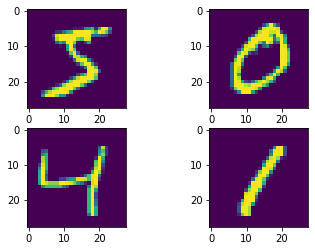

In [4]:
plt.gcf
for i in range(4):
    img=np.array(x[i])
    plt.subplot(2,2,i+1)
    plt.imshow(img)
plt.show()

# data preparation

In [5]:
def convert_onehot(index,len):
    onehot=np.zeros((len,))
    onehot[index]=1
    return onehot
convert_onehot(y[0],10)    #convert label to onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [6]:
def convert_label(indice):
    temp=[]
    for i in range(len(indice)):
        temp.append(convert_onehot(indice[i],10))
    return temp
#labels to onehot vector

In [7]:
def preprocess(x,y):
    x=tf.cast(x,dtype=tf.float32)/255.    #normalazation
    #x=tf.reshape(x,[-1,28*28])            #flatten
    y=tf.cast(y,dtype=tf.int32)
    y=tf.one_hot(y,depth=10)
    return x,y

In [8]:
xy_dataset=tf.data.Dataset.from_tensor_slices((x,y)) #make dataset object
xy_dataset=xy_dataset.shuffle(len(y))  #random
xy_dataset=xy_dataset.batch(128)       #mini batch
xy_dataset=xy_dataset.map(preprocess)
print(xy_dataset)

<MapDataset shapes: ((None, 28, 28, 1), (None, 10)), types: (tf.float32, tf.float32)>


# make model

In [9]:
network = Sequential([
    layers.Conv2D(6,kernel_size=3,strides=1), # 第一个卷积层, 6 个 3x3 卷积核
    layers.MaxPooling2D(pool_size=2,strides=2), # 高宽各减半的池化层
    layers.ReLU(), # 激活函数
    layers.Conv2D(16,kernel_size=3,strides=1), # 第二个卷积层, 16 个 3x3 卷积核
    layers.MaxPooling2D(pool_size=2,strides=2), # 高宽各减半的池化层
    layers.ReLU(), # 激活函数
    layers.Flatten(), # 打平层，方便全连接层处理
    layers.Dense(120, activation='relu'), # 全连接层，120 个节点
    layers.Dense(84, activation='relu'), # 全连接层，84 节点
    layers.Dense(10) # 全连接层，10 个节点
                ])

In [10]:
network.build(input_shape=(4, 28,28,1))
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (4, 26, 26, 6)            60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (4, 13, 13, 6)            0         
_________________________________________________________________
re_lu (ReLU)                 (4, 13, 13, 6)            0         
_________________________________________________________________
conv2d_1 (Conv2D)            (4, 11, 11, 16)           880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (4, 5, 5, 16)             0         
_________________________________________________________________
re_lu_1 (ReLU)               (4, 5, 5, 16)             0         
_________________________________________________________________
flatten (Flatten)            (4, 400)                  0

In [11]:
network.compile(optimizer= optimizers.Adam(lr=0.01),
               loss=losses.CategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
history=network.fit(xy_dataset,epochs=10)
history.history

Epoch 1/10
469/469 [==============================] - 15s 32ms/step - loss: 0.1605 - accuracy: 0.9505
Epoch 2/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0624 - accuracy: 0.9807
Epoch 3/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0550 - accuracy: 0.9837
Epoch 4/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0457 - accuracy: 0.9864
Epoch 5/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0438 - accuracy: 0.9871
Epoch 6/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0406 - accuracy: 0.9884
Epoch 7/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0399 - accuracy: 0.9889
Epoch 8/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0379 - accuracy: 0.9886
Epoch 9/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0365 - accuracy: 0.9897
Epoch 10/10
469/469 [==============================] - 15s 32ms/step - loss: 0.035

{'loss': [0.16053901612758636,
  0.062395963817834854,
  0.055015191435813904,
  0.04567939415574074,
  0.04379158094525337,
  0.0405874140560627,
  0.03990473598241806,
  0.037946660071611404,
  0.03650447353720665,
  0.03582059592008591],
 'accuracy': [0.9504500031471252,
  0.9807000160217285,
  0.9837333559989929,
  0.9864166378974915,
  0.9871000051498413,
  0.9884166717529297,
  0.9888666868209839,
  0.9886333346366882,
  0.9896666407585144,
  0.9904833436012268]}

# test

In [12]:
test_dataset=tf.data.Dataset.from_tensor_slices((x_test,y_test))
test_dataset=test_dataset.batch(128)
test_dataset=test_dataset.map(preprocess)
out=network.predict(x_test)
print(x_test.shape)
print(out.shape)

(10000, 28, 28, 1)
(10000, 10)


In [13]:
network.evaluate(test_dataset)

79/79 [==============================] - 1s 16ms/step - loss: 0.0605 - accuracy: 0.9859


[0.06050664559006691, 0.9858999848365784]